# Trying multiple languages


In [1]:
from tagger import MyTagger
from utils import *

In [9]:
gal_tagger = MyTagger(
    train_filename="data/galician/CTG/gl_ctg-ud-train.conllu",
    val_filename="data/galician/CTG/gl_ctg-ud-dev.conllu",
    test_filename="data/galician/CTG/gl_ctg-ud-test.conllu",
)

In [10]:
gal_tagger_PUD = MyTagger(train_filename="data/galician/PUD/gl_pud-ud-test.conllu", val_size=0.2, test_size=0.2)

TypeError: MyTagger.__init__() got an unexpected keyword argument 'val_size'

In [ ]:
gal_tagger_TreeGal = MyTagger(
    train_filename="data/galician/TreeGal/gl_treegal-ud-train.conllu",
    test_filename="data/galician/TreeGal/gl_treegal-ud-test.conllu",
    val_size=0.2,
)

In [7]:
train_sentences, train_words, val_sentences, val_words, test_sentences, test_words = calculate_statistics_tagger_data(
    gal_tagger
)

print(f"Training dataset - sentences: {train_sentences}, words: {train_words}")
print(f"Validation dataset - sentences: {val_sentences}, words: {val_words}")
print(f"Test dataset - sentences: {test_sentences}, words: {test_words}")

Training dataset - sentences: 2272, words: 79327
Validation dataset - sentences: 860, words: 29772
Test dataset - sentences: 861, words: 29738


In [3]:
max_sentence_num_words = 100
mean_len, std_len, max_len, sentences_over_max_length = calculate_statistics_dataset(
    gal_tagger.X_train, max_sentence_num_words=max_sentence_num_words
)

print(f"Mean sentence length: {round(mean_len, 2)}")
print(f"Standard deviation of sentence length: {round(std_len, 2)}")
print(f"Max sentence length: {round(max_len, 2)}")

print(f"Number of sentences over {max_sentence_num_words} words: {len(sentences_over_max_length)}")
print(
    f"Percentage of sentences over {max_sentence_num_words} words: {len(sentences_over_max_length) / len(gal_tagger.X_train) * 100:.2f}%\n"
)
for i, sentence in enumerate(sentences_over_max_length):
    print(
        f'Sentence {i} has more than {max_sentence_num_words} words ({len(sentence.split())}). Sentence: "{sentence}"'
    )

Mean sentence length: 34.92
Standard deviation of sentence length: 8.48
Max sentence length: 88
Number of sentences over 100 words: 0
Percentage of sentences over 100 words: 0.00%



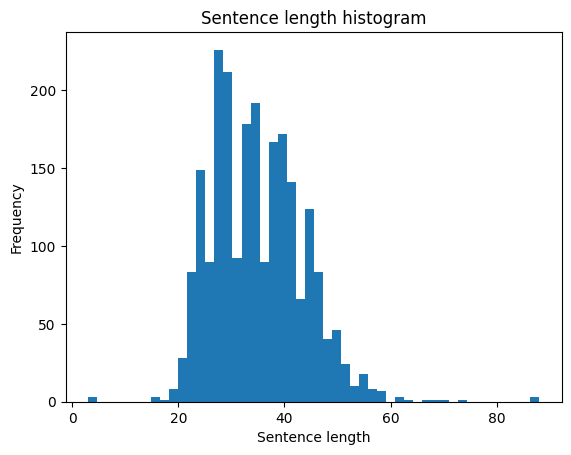

In [4]:
plot_sentence_length_histogram(gal_tagger.X_train)

In [12]:
gal_tagger.preprocess_data(max_sentence_num_words=100, with_punctuation=True)
print(f"Sentence 1: {gal_tagger.X_train[0]}")
print(f"Label 1: {gal_tagger.y_train[0]}")

Sentence 1: De novo , aprecia se unha significativa dependencia entre o nivel de acceso a a Internet e determinadas características socioeconómicas de os territorios , o que aporta o xa citado factor de matiz importante sobre a avaliación de os datos anteriores .
Label 1: [ 3  2 14 17 12  7  2  9  3  7  9  3  9  3  7 13  6 17  9  2  3  7  9 14
  7 12 17  7  4 17  9  3  9  2  3  7  9  3  7  9  2 14  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [13]:
X_plain_train = {token for sentence in gal_tagger.X_train for token in sentence.split()}
print(f"Number of unique tokens: {len(X_plain_train)}")

X_plain_test = {token for sentence in gal_tagger.X_test for token in sentence.split()}
print(f"Number of unique tokens: {len(X_plain_test)}")

Number of unique tokens: 12406
Number of unique tokens: 6767


In [14]:
gal_tagger.build_model(vocabulary_size=10000, units=64, output_dim=50, bidirectional=False)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 100)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 100, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           29440     
                                                                 
 time_distributed (TimeDist  (None, 100, 18)           1170      
 ributed)                                                        
                                                                 
Total params: 530610 (2.02 MB)
Trainable params: 530610 (2.

In [15]:
gal_tagger.train(
    epochs=10, batch_size=64, optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


Epoch 1/10

36/36 [==============================] - 14s 188ms/step - loss: 2.5907 - accuracy: 0.2228 - val_loss: 2.2936 - val_accuracy: 0.2321
Epoch 2/10
36/36 [==============================] - 5s 144ms/step - loss: 2.2242 - accuracy: 0.2461 - val_loss: 2.1326 - val_accuracy: 0.2704
Epoch 3/10
36/36 [==============================] - 5s 145ms/step - loss: 1.9701 - accuracy: 0.4931 - val_loss: 1.7083 - val_accuracy: 0.5981
Epoch 4/10
36/36 [==============================] - 5s 141ms/step - loss: 1.4343 - accuracy: 0.6321 - val_loss: 1.1768 - val_accuracy: 0.6883
Epoch 5/10
36/36 [==============================] - 5s 126ms/step - loss: 1.0297 - accuracy: 0.7413 - val_loss: 0.8779 - val_accuracy: 0.7864
Epoch 6/10
36/36 [==============================] - 5s 126ms/step - loss: 0.7526 - accuracy: 0.8086 - val_loss: 0.6513 - val_accuracy: 0.8220
Epoch 7/10
36/36 [==============================] - 4s 121ms/step - loss: 0.5435 - accuracy: 0.8593 - val_loss: 0.5022 - val_accuracy: 0.8619
Epo

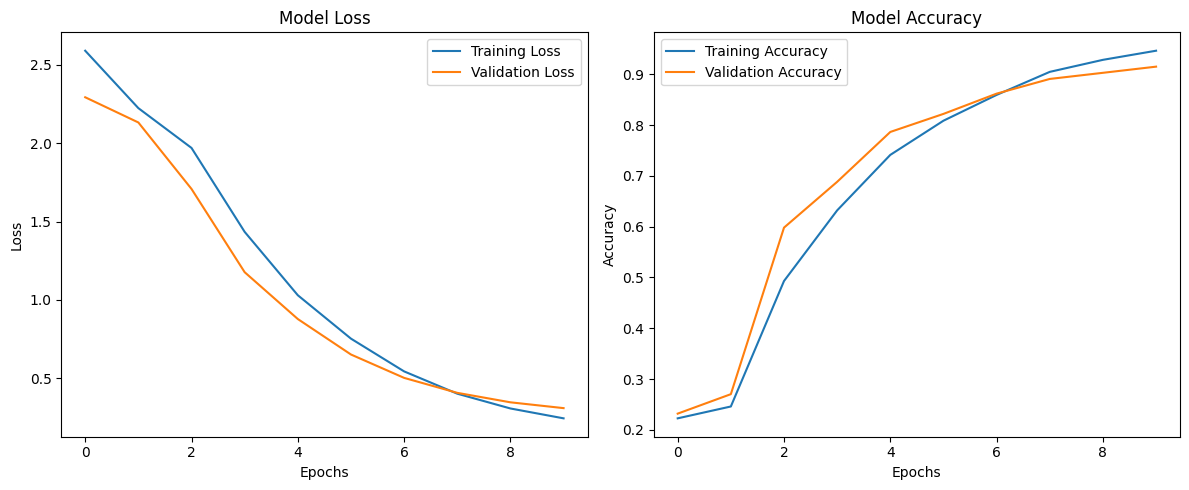

In [16]:
gal_tagger.plot_training_history()

In [17]:
gal_tagger.evaluate()

27/27 [==============================] - 1s 35ms/step - loss: 0.3155 - accuracy: 0.9133
